In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import math

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from numpy import array
from scipy.optimize import curve_fit

In [2]:
 #Change plot settings
plt.rcParams['axes.linewidth'] = 5
plt.rcParams['font.size'] = 15
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.major.width'] = 5
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.major.width'] = 5

In [3]:
os.chdir('/content/drive/My Drive/New LSTM Crack')

In [4]:
N1600 = './Test/1600N_t56.csv'
N1600_df = pd.read_csv(N1600)
N1600_arr = np.asarray(N1600_df)
N1600_cl = N1600_arr[:,1]

N1700 = './Training/1700N_t22.csv'
N1700_df = pd.read_csv(N1700)
N1700_arr = np.asarray(N1700_df)
N1700_cl = N1700_arr[:,1]

N1800 = './Training/1800N_t17.csv'
N1800_df = pd.read_csv(N1800)
N1800_arr = np.asarray(N1800_df)
N1800_cl = N1800_arr[:,1]

In [5]:
interval = 1000
avg = 50

In [6]:
i = 0

X = []

while i <= len(N1600_cl):
  X_timestep = [[1600],[1700],[1800]]
  X.append(X_timestep)
  i += interval

x = np.asarray(X)

In [7]:
i = 0

Y = []

while i <= len(N1600_cl):
  Y_timestep = [[i],[i],[i]]
  Y.append(Y_timestep)
  i += interval

y = np.asarray(Y)

In [8]:
i = 0

z = []

while i <= len(N1600_cl):
  if i == 0:
    z_timestep = [[np.average(N1600_cl[i:i+avg])], [np.average(N1700_cl[i:i+avg])], [np.average(N1800_cl[i:i+avg])]]
    z.append(z_timestep)
    i+= interval
  else:
    z_timestep = [[np.average(N1600_cl[i-avg:i+avg])], [np.average(N1700_cl[i-avg:i+avg])], [np.average(N1800_cl[i-avg:i+avg])]]
    z.append(z_timestep)
    i+= interval

Z = np.asarray(z)

In [9]:
coeff_mtx = []
X = x.flatten()
print(X.shape)
Y = y.flatten()

A = np.array([X*0+1, X, Y, X**2, X**2*Y, X**2*Y**2, Y**2, X*Y**2, X*Y]).T
B = Z.flatten()
print(A.shape, B.shape)
coeff, r, rank, s = np.linalg.lstsq(A, B)
coeff_mtx.append(coeff)

print(coeff)  

coeff_mtx = np.asarray(coeff_mtx)

(207,)
(207, 9) (207,)
[-2.64883571e-07 -1.90718561e-04 -6.92433836e-04  1.44205045e-07
 -2.40680615e-10  7.67957900e-15  2.09958624e-08 -2.53856299e-11
  8.17956859e-07]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


In [ ]:
print(coeff_mtx)

[[-2.64809964e-07 -1.90702169e-04 -6.92426305e-04  1.44213036e-07
  -2.40679038e-10  7.67956662e-15  2.09957801e-08 -2.53855343e-11
   8.17949002e-07]]


In [ ]:
times = np.arange(0, 70000, 1)
forces = np.arange(1600,1876, 25)

In [ ]:
heatmap_vals = []

for i in coeff_mtx:
  for j in times:
    for k in forces:
      coeff_x = k
      coeff_y = j
      val = i[0] + coeff_x*i[1] + coeff_y*i[2] + coeff_x**2*i[3] + coeff_x**2*coeff_y*i[4] + coeff_x**2*coeff_y**2*i[5] + coeff_y**2*i[6] + coeff_x*coeff_y**2*i[7] + coeff_x*coeff_y*i[8]
      heatmap_vals.append([coeff_x, coeff_y, val])

heatmap_vals = np.asarray(heatmap_vals)

In [ ]:
print(heatmap_vals)

[[1.60000000e+03 0.00000000e+00 4.05991965e-02]
 [1.62500000e+03 0.00000000e+00 4.83846685e-02]
 [1.65000000e+03 0.00000000e+00 5.63901744e-02]
 ...
 [1.82500000e+03 6.99990000e+04 1.23093305e+00]
 [1.85000000e+03 6.99990000e+04 1.46979451e+00]
 [1.87500000e+03 6.99990000e+04 1.73456188e+00]]


In [ ]:
print(heatmap_vals.shape)
print(heatmap_vals[:,0].reshape(len(times),len(forces)))

(840000, 3)
[[1600. 1625. 1650. ... 1825. 1850. 1875.]
 [1600. 1625. 1650. ... 1825. 1850. 1875.]
 [1600. 1625. 1650. ... 1825. 1850. 1875.]
 ...
 [1600. 1625. 1650. ... 1825. 1850. 1875.]
 [1600. 1625. 1650. ... 1825. 1850. 1875.]
 [1600. 1625. 1650. ... 1825. 1850. 1875.]]


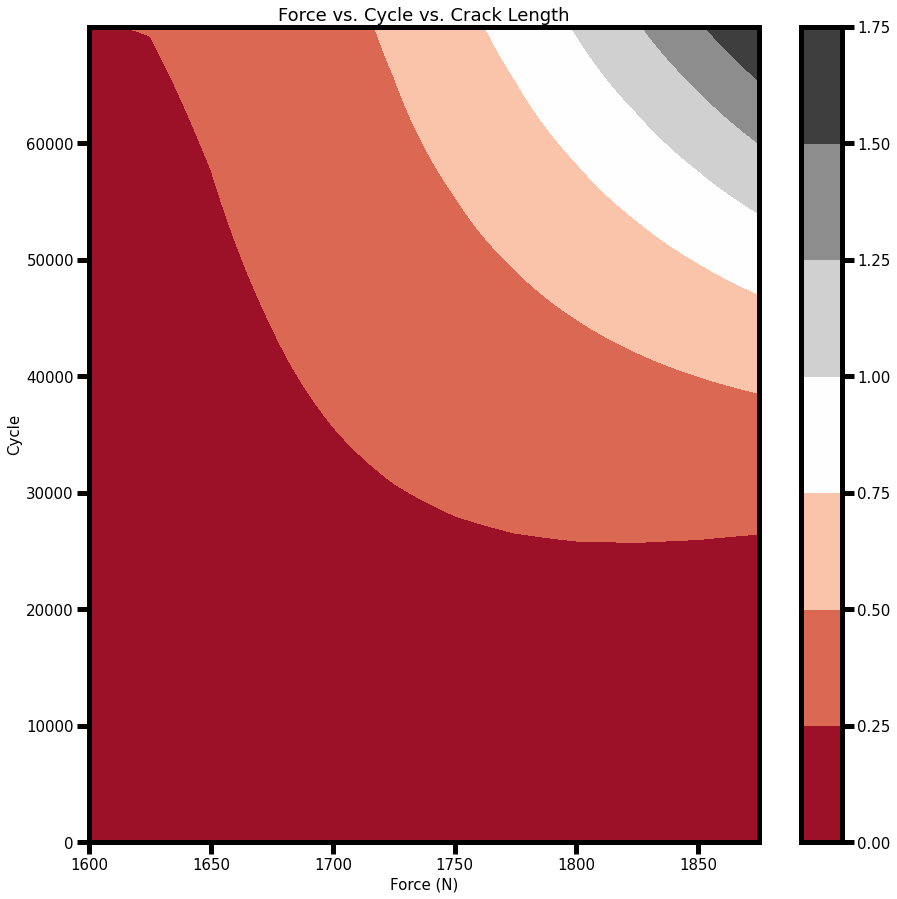

In [ ]:
plt.figure(figsize=(15, 15))
plt.contourf(heatmap_vals[:,0].reshape(len(times),len(forces)),heatmap_vals[:,1].reshape(len(times),len(forces)),heatmap_vals[:,2].reshape(len(times),len(forces)), cmap = 'RdGy')
plt.colorbar()
plt.xlabel('Force (N)')
plt.ylabel('Cycle')
plt.title('Force vs. Cycle vs. Crack Length')
plt.savefig("2DPoly_Contour_plot_more.png")